<a href="https://colab.research.google.com/github/umiSirya/MachineLearning_2/blob/main/Starbucks_reviews)sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
nltk.download('punkt')

nltk.download('punkt_tab')

nltk.download('vader_lexicon')

nltk.download('stopwords')

nltk.download('opinion_lexicon')

nltk.download('punkt')

nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import opinion_lexicon
from nltk import download
from nltk.tokenize import word_tokenize

In [34]:
df = pd.read_csv('/content/reviews_data.csv')
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [35]:
# Creating a dataframe with review title as the column
starbucks = pd. DataFrame(df['Review'])
starbucks.head()

,Review
0,Amber and LaDonna at the Starbucks on Southwes...
1,** at the Starbucks by the fire station on 436...
2,I just wanted to go out of my way to recognize...
3,Me and my friend were at Starbucks and my card...
4,I’m on this kick of drinking 5 cups of warm wa...


# Pre-processing

In [36]:
# Lowercasing
starbucks['Review'] = starbucks['Review'].str.lower()

# Removing punctuation marks
starbucks['Review'] = starbucks['Review'].str.replace('[^\w\s]','')

# tokenization
starbucks['Review'] = starbucks['Review'].apply(lambda x: word_tokenize(x))

# stopword removal
stop_words = set(stopwords.words('english'))
starbucks['Review'] = starbucks['Review'].apply(lambda x: [word for word in x if word not in stop_words])



In [37]:
# Ensure all reviews are strings so i can apply vader
starbucks['Review'] = starbucks['Review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

sid = SentimentIntensityAnalyzer()
starbucks['scores'] = starbucks['Review'].apply(lambda review: sid.polarity_scores(review))


In [38]:
# apply vader
sid = SentimentIntensityAnalyzer()
starbucks['scores'] = starbucks['Review'].apply(lambda review: sid.polarity_scores(review))

sid = SentimentIntensityAnalyzer()
starbucks['scores'] = starbucks['Review'].apply(lambda review: sid.polarity_scores(review))
starbucks.head()

starbucks['compound']  = starbucks['scores'].apply(lambda score_dict: score_dict['compound'])
starbucks.head()

starbucks['comp_score'] = starbucks['compound'].apply(lambda c: 'positive' if c >=0 else 'negative')
starbucks.head()

,Review,scores,compound,comp_score
0,amber ladonna starbucks southwest parkway alwa...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.8779,positive
1,* * starbucks fire station 436 altamonte sprin...,"{'neg': 0.081, 'neu': 0.561, 'pos': 0.358, 'co...",0.9694,positive
2,wanted go way recognize starbucks employee bil...,"{'neg': 0.142, 'neu': 0.623, 'pos': 0.236, 'co...",0.5242,positive
3,friend starbucks card ’ work . thankful worker...,"{'neg': 0.094, 'neu': 0.444, 'pos': 0.462, 'co...",0.9623,positive
4,’ kick drinking 5 cups warm water . work insta...,"{'neg': 0.045, 'neu': 0.472, 'pos': 0.483, 'co...",0.9723,positive


**Bar Plot of Sentiment Analysis(using vader)**

<ipython-input-39-64186b694174>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


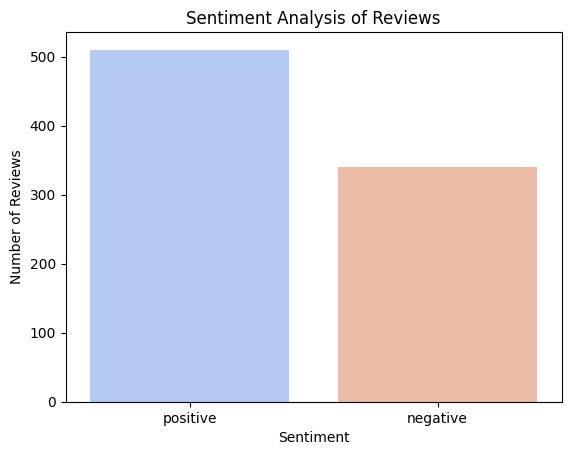

In [39]:
#Count the number of positive and negative reviews
sentiment_counts = starbucks['comp_score'].value_counts()

#Plot a bar graph
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

**Pie Chart Of Sentiment Distribution**

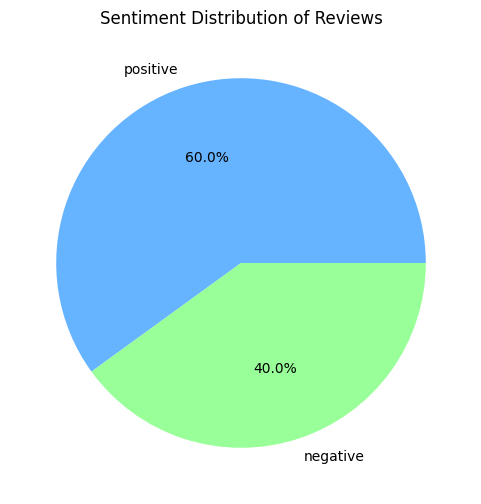

In [40]:
# pie chart
plt.figure(figsize=(6, 6))
starbucks['comp_score'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ff6666'])
plt.title('Sentiment Distribution of Reviews')
plt.ylabel('')
plt.show()

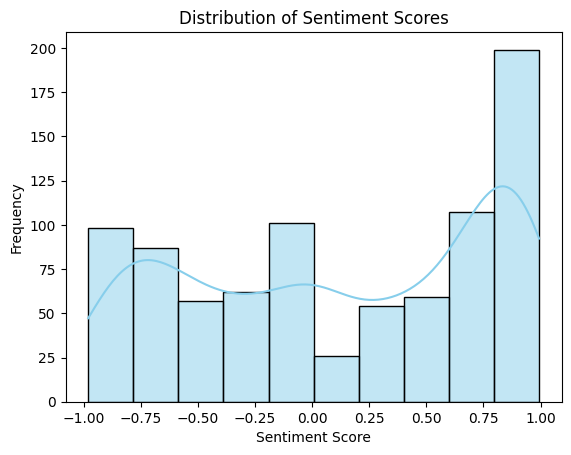

In [41]:
sns.histplot(starbucks['compound'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

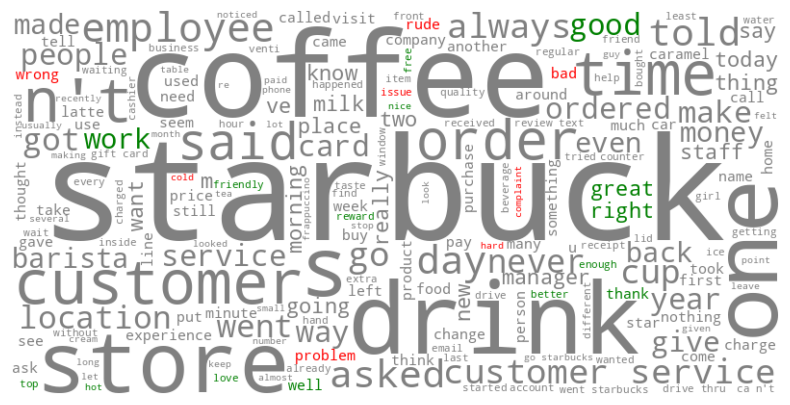

In [49]:

# Sample text from reviews
text = " ".join(review for review in starbucks.Review)

# Load positive and negative word sets
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Custom color function for word cloud
def sentiment_color_func(word, **kwargs):
    if word in positive_words:
        return 'green'
    elif word in negative_words:
        return 'red'
    else:
        return 'gray'  # Neutral color for unclassified words

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Apply sentiment color function
wordcloud.recolor(color_func=sentiment_color_func)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [55]:
# unigram. most frequent words
from collections import Counter

# Concatenate all reviews into one big text
all_reviews = ' '.join(starbucks['Review'])

# Tokenize the words
tokens = word_tokenize(all_reviews)

# Convert to lower case
tokens = [token.lower() for token in tokens]

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

# Count the frequency of each word
word_freq = Counter(tokens)

# Get the most common unigrams
most_common_unigrams = word_freq.most_common()

print(most_common_unigrams)


[('starbucks', 1052), ('coffee', 595), ('customer', 286), ('one', 279), ('get', 277), ('drink', 275), ('store', 259), ('service', 256), ('time', 237), ('like', 224), ('order', 218), ('said', 217), ('go', 215), ('would', 213), ('card', 197), ('went', 180), ('asked', 164), ('back', 163), ('told', 159), ('ordered', 150), ('never', 147), ('got', 143), ('always', 142), ('manager', 137), ('could', 132), ('cup', 131), ('even', 126), ('customers', 124), ('day', 118), ('location', 114), ('money', 114), ('employees', 113), ('people', 109), ('going', 107), ('good', 103), ('way', 102), ('drinks', 102), ('times', 99), ('make', 98), ('every', 98), ('know', 92), ('give', 91), ('years', 91), ('new', 89), ('made', 88), ('milk', 87), ('first', 86), ('two', 86), ('morning', 85), ('want', 85), ('really', 84), ('work', 82), ('great', 81), ('food', 80), ('today', 79), ('called', 79), ('also', 79), ('rude', 77), ('last', 75), ('free', 73), ('staff', 73), ('use', 73), ('ca', 71), ('barista', 70), ('right', 69